In [3]:
#Os imports
import numpy as np
import pymp
import matplotlib.pyplot as plt

In [4]:
#Enunciado

'''

Utilizando imagens de uma galáxia obtidas com um CCD monocromático (vários frames tirados de uma mesma galáxia), 
com resolução de 128x128 pixels (ccd1.dat, ccd2.dat, ... , ccd512.dat, comprimidas no arquivo ccd.zip), onde 
cada pixel tem o valor do brilho medido em unidades arbitrárias, mostre que o erro padrão (desvio padrão 
dos valores médios dos pixels – a média dos pixels da imagem) cai com √n na medida que as imagens são 
sobrepostas (calculando a média dos pixels somados – todos os pixels da imagem), para isso calcule o 
desvio padrão da distribuição das médias de 2,3,4,...,128 imagens, faça isso sorteando 256 amostras (com o 
número de imagens a serem utilizados para a média), a partir das 512 originais, com esses tamanhos.Faça um 
gráfico com a evolução do erro padrão de acordo com o número de imagens acumuladas e alguns exemplos das 
imagens acumuladas (com apenas 1 imagem, com 4 imagens sobrepostas/empilhadas, 16, 32, 64, ... , 512) (veja na 
figura abaixo a diferença entre 1 imagem e 512 empilhadas – as imagens têm ruído), para plotar as imagens use 
a função matshow do matplotlib. Em quais situações observacionais imagens são sobrepostas? Qual a vantagem 
deste procedimento com relação a variação da relação Sinal-Ruído? Quais tipos de sistemáticos e ruídos são 
atenuados desta forma? Qual o brilho médio do centro da galáxia, considerando como uma aproximação para este a 
média do quadrado de 16x16 pixels no centro da imagem?

'''

CCD = np.array([(np.loadtxt("ccd/ccd{}.dat".format(i))) for i in range(1, 513)])
desvio = pymp.shared.array(127, dtype='float64')

CCD.shape
with pymp.Parallel(4) as p:
    for i in p.range(2,129):
        amostras = np.zeros(256)
        for j in range(256):
            posicao = np.random.randint(0, 512, size = i)
            amostras[j] = np.mean(CCD[posicao])
        desvio[i-2] = np.std(amostras)
        print(amostras, '\n')
    print(desvio, '\n')


[0.27802154 0.27494177 0.2753964  0.27964422 0.27428238 0.27164816
 0.27536953 0.26612547 0.26936894 0.27401945 0.26380909 0.274954
 0.27627325 0.27536332 0.27501315 0.27320351 0.27316342 0.27944425
 0.27688126 0.2808698  0.27996433 0.28761906 0.28080597 0.2696678
 0.27904908 0.27656203 0.28362236 0.27574393 0.27711578 0.27628941
 0.26987301 0.28061495 0.27370088 0.2769491  0.27490548 0.26951315
 0.27084984 0.27393375 0.27229004 0.26788846 0.27515476 0.28180288
 0.27323831 0.27410996 0.2675326  0.26844312 0.2763128  0.27762186
 0.27983311 0.27934534 0.27531457 0.27446115 0.27779294 0.27389862
 0.28246996 0.27735563 0.27513827 0.26863768 0.27488621 0.28262958
 0.26716614 0.27573169 0.2705509  0.27344547 0.27676959 0.27898224
 0.26481516 0.27337383 0.26126861 0.26980027 0.26831198 0.27593204
 0.27667249 0.27673687 0.27118803 0.2709355  0.27425392 0.2744846
 0.27449486 0.27366223 0.27116664 0.27397878 0.27842205 0.27883995
 0.2742684  0.27335495 0.27275632 0.27339088 0.26955665 0.27799701

[0.27214268 0.27211168 0.27583957 0.27328473 0.27406398 0.27544013
 0.27308993 0.27989619 0.27305275 0.2680153  0.27026194 0.27102336
 0.27616108 0.27394078 0.27112639 0.27356523 0.26986731 0.27983189
 0.27309086 0.27360693 0.27641823 0.27681895 0.27216947 0.27525316
 0.27514975 0.27469915 0.2781014  0.27863282 0.27483388 0.27600044
 0.27504665 0.28096339 0.27412474 0.27637475 0.27614574 0.27521235
 0.27001447 0.27447331 0.27772806 0.27669621 0.27593402 0.27452399
 0.27276964 0.27175222 0.27194552 0.27400601 0.27697472 0.27781383
 0.27373286 0.2736518  0.27566754 0.28213644 0.27682411 0.27370514
 0.27550561 0.27357973 0.28203114 0.27340847 0.26994241 0.27391315
 0.27251452 0.27127255 0.27526447 0.27213309 0.27688844 0.27471146
 0.28063824 0.2754874  0.27633117 0.26915454 0.27314704 0.27869355
 0.27450007 0.27599616 0.27586355 0.27158021 0.2757634  0.27715726
 0.27502602 0.2753579  0.27515831 0.27773523 0.27115145 0.27403497
 0.2753592  0.27194408 0.27004032 0.27237154 0.27969739 0.2745

[0.27570974 0.27469561 0.27364195 0.27500755 0.27457083 0.27440634
 0.27469863 0.27467996 0.27407125 0.27518673 0.27446111 0.27510675
 0.27551556 0.27410235 0.27479063 0.27591123 0.27338788 0.27566495
 0.27345307 0.2743783  0.27514148 0.27628666 0.27464512 0.27430543
 0.27568729 0.27487488 0.27277968 0.27368848 0.27519089 0.2746863
 0.27496319 0.27404178 0.27517018 0.27561377 0.27502904 0.27353235
 0.27479599 0.27582852 0.27507012 0.27476076 0.274972   0.27481299
 0.27433165 0.27505844 0.27522077 0.27452477 0.2738008  0.27496933
 0.27558943 0.27493604 0.27633397 0.27433138 0.2742373  0.2741987
 0.27614496 0.27367404 0.27380628 0.2748449  0.27370335 0.2747574
 0.27364375 0.27551633 0.27494536 0.27379882 0.27569779 0.2741092
 0.2748916  0.27413944 0.27540402 0.27422807 0.27377974 0.27495486
 0.27528334 0.27555549 0.27472154 0.27463967 0.27597121 0.27442561
 0.27489114 0.2738477  0.27373298 0.27527201 0.27415773 0.27501794
 0.27612457 0.27442637 0.27467699 0.27569014 0.2739887  0.27548721

 0.27556744 0.27619398 0.27372143 0.2749755 ] 

[0.27496416 0.27538779 0.27624519 0.27582499 0.27279137 0.27535688
 0.27339667 0.27710787 0.27571701 0.27307937 0.27368168 0.27817551
 0.27613051 0.27297765 0.27797664 0.27534109 0.27429865 0.27398167
 0.27298801 0.2785467  0.27238461 0.27510982 0.27137123 0.26913018
 0.27259783 0.27332488 0.27590565 0.27207746 0.2739709  0.27368026
 0.27613871 0.27408454 0.27710303 0.27256605 0.27560221 0.27178806
 0.27360337 0.27288362 0.27231732 0.27552965 0.26951517 0.2729139
 0.27476366 0.27309316 0.27625913 0.27259206 0.27037959 0.27479448
 0.27455951 0.27356764 0.27499459 0.27436617 0.27529089 0.27249538
 0.27493527 0.27206972 0.27284154 0.2778395  0.27375473 0.27589091
 0.2760934  0.27430622 0.2745411  0.27230924 0.27529151 0.27622372
 0.27530214 0.2726262  0.27583464 0.27737989 0.27350302 0.27329196
 0.27873727 0.27345537 0.27381522 0.27493074 0.27352747 0.27529775
 0.27279633 0.27488374 0.27539268 0.27339987 0.27436774 0.2763459
 0.27632342 0.27

 

[0.27170096 0.27276206 0.27432671 0.27359494 0.27642304 0.27133185
 0.27228956 0.27475827 0.27650231 0.27470543 0.27466615 0.27310006
 0.27382336 0.27505322 0.27754746 0.27419584 0.27573819 0.27272538
 0.27593083 0.27372631 0.27633103 0.27614881 0.27416661 0.27766221
 0.27409403 0.27835918 0.2752675  0.27332697 0.27908592 0.27575381
 0.27378328 0.27447019 0.27324717 0.27529071 0.27367638 0.27792634
 0.27372    0.27238799 0.27069929 0.27353695 0.27221389 0.27113374
 0.27365943 0.27305003 0.2745435  0.27408105 0.2717127  0.27822101
 0.27587739 0.27554393 0.27705237 0.27570799 0.27751935 0.27527713
 0.27474653 0.27489721 0.27286265 0.27458127 0.27506452 0.27506477
 0.27428158 0.27507745 0.27373929 0.27450125 0.27527391 0.27458347
 0.27797615 0.27375777 0.27470185 0.27413551 0.27401666 0.27137306
 0.27306465 0.27354376 0.27489487 0.27212013 0.27579041 0.2745379
 0.27219559 0.27688406 0.27669816 0.27628352 0.27556217 0.27275695
 0.27610069 0.27717934 0.27501341 0.27528538 0.27172427 0.27

[0.27612046 0.27423505 0.27538867 0.27323453 0.27440281 0.27527474
 0.27487283 0.27528566 0.27415062 0.27553064 0.27451004 0.27408282
 0.27537486 0.27520561 0.27417643 0.27504024 0.27511    0.27603179
 0.27422955 0.27488852 0.27543771 0.27539607 0.27546773 0.27308674
 0.2743635  0.27537076 0.2744827  0.274954   0.27529016 0.27394318
 0.27443713 0.27398616 0.27374986 0.27520504 0.27522695 0.27476553
 0.27439525 0.274157   0.27343827 0.2743388  0.27334726 0.27475694
 0.2743481  0.27393051 0.27410489 0.27474906 0.27470267 0.27540101
 0.27417444 0.27507389 0.27559478 0.27405048 0.27496384 0.27414078
 0.27486793 0.27399382 0.27565036 0.27355724 0.27480324 0.2752176
 0.27426436 0.27403203 0.27547165 0.27533478 0.27498747 0.27346626
 0.27514929 0.27422584 0.27543673 0.2746481  0.27396792 0.27468727
 0.27478034 0.27411039 0.27344604 0.27662183 0.27536516 0.27410954
 0.27302294 0.27399532 0.27357577 0.27425106 0.27373594 0.2754316
 0.27488094 0.27405478 0.27469294 0.27536889 0.27394131 0.274646

 0.2744245  0.2755124  0.27370314 0.27336865] 

[0.27520811 0.27283153 0.27322566 0.27203174 0.27644604 0.27264561
 0.27216052 0.2763243  0.278398   0.27655395 0.27451826 0.27683723
 0.27561045 0.27492883 0.27450713 0.27493803 0.2749121  0.2728663
 0.27343894 0.27630937 0.27241923 0.27460673 0.27576016 0.27754138
 0.27503409 0.27408789 0.2736955  0.27394762 0.27354084 0.27311136
 0.27653867 0.27509669 0.27490637 0.27726581 0.27381679 0.2754387
 0.27040954 0.27429304 0.27247083 0.27527505 0.27574789 0.27579135
 0.27341347 0.27375583 0.27580396 0.27246461 0.27245332 0.27096974
 0.27309805 0.2760586  0.27552484 0.27731164 0.27367198 0.2717308
 0.27459139 0.27489809 0.27442219 0.27352908 0.27542098 0.27509288
 0.27634268 0.27375686 0.27699461 0.27613239 0.27482129 0.27708176
 0.27784348 0.27390448 0.27589849 0.27062495 0.27653054 0.27243132
 0.27586141 0.27490979 0.27520225 0.27606296 0.27434094 0.27360281
 0.27802733 0.27719321 0.2719377  0.27402511 0.27313168 0.27773515
 0.27411019 0.273

 0.27406184 0.27456062 0.27412601 0.27424032] 

[0.27481071 0.27606865 0.27683598 0.27624    0.27469491 0.27533462
 0.27526593 0.27303184 0.2738959  0.27433044 0.27486838 0.27532634
 0.27412846 0.27325643 0.27614999 0.27481172 0.27288769 0.27523231
 0.27558344 0.27554313 0.27578136 0.27273794 0.27443538 0.27498177
 0.27385157 0.27461197 0.27377111 0.27415215 0.27611505 0.27472432
 0.27368782 0.2750921  0.27359702 0.27414128 0.27428524 0.27260664
 0.27496562 0.27441591 0.27397265 0.27414794 0.2746843  0.27321811
 0.27291034 0.27490032 0.2743955  0.27604906 0.27398465 0.27461668
 0.27430135 0.2738273  0.27438143 0.27681778 0.27328075 0.27611481
 0.27604733 0.27623545 0.27503946 0.27455234 0.27631677 0.27515328
 0.27426875 0.2736882  0.27448413 0.27594287 0.27276415 0.27447947
 0.27479403 0.2736728  0.27456116 0.27426406 0.27452129 0.27380585
 0.27355252 0.27379983 0.27574141 0.27275388 0.27324379 0.27550116
 0.2733839  0.27502532 0.27426994 0.27570352 0.27467088 0.27418745
 0.27476666 0.

[0.27528129 0.27406525 0.27776448 0.27423043 0.27235615 0.27456384
 0.27590689 0.27534949 0.27333947 0.27385735 0.2755971  0.27428037
 0.27148879 0.27539004 0.27456238 0.27550032 0.27631844 0.27499319
 0.2755375  0.27354108 0.27243561 0.27551608 0.27518934 0.27363233
 0.27588272 0.27551292 0.27477928 0.272627   0.27304291 0.2732602
 0.27525922 0.27329952 0.27231731 0.27639351 0.27528193 0.27547084
 0.27429511 0.27671321 0.27354678 0.27309514 0.2738561  0.27493467
 0.27669436 0.27323372 0.27656206 0.27576615 0.27447502 0.27516875
 0.27383539 0.27724979 0.27403488 0.27517659 0.27531188 0.27684538
 0.27511178 0.27417475 0.27368561 0.27362267 0.27577452 0.27334079
 0.27446666 0.27502043 0.2743879  0.27551712 0.27370119 0.27433142
 0.27745525 0.27223719 0.27567729 0.27550552 0.27471025 0.27581231
 0.27418726 0.27494423 0.27398373 0.27464252 0.27415872 0.27538904
 0.27486132 0.27236814 0.27514524 0.277547   0.27435999 0.27770165
 0.27323222 0.27541868 0.27547496 0.27349802 0.27502368 0.27411

[0.27412603 0.27398208 0.27448557 0.27404249 0.27474048 0.27431634
 0.27513128 0.27405477 0.27336252 0.27417405 0.27503382 0.27582554
 0.27429004 0.27434115 0.2745856  0.27452977 0.27427831 0.27469619
 0.27493431 0.27518743 0.27421683 0.27590053 0.27360973 0.27427994
 0.27490035 0.27433551 0.27541937 0.27443565 0.27354969 0.27466853
 0.27477135 0.27423331 0.27416085 0.27405342 0.27360065 0.27466507
 0.27456511 0.27395002 0.27456453 0.27592281 0.2740363  0.27445999
 0.27494088 0.27516483 0.2754334  0.27246911 0.27581777 0.27523419
 0.27481512 0.2745783  0.27521381 0.2757862  0.27558995 0.27390346
 0.27456101 0.275457   0.27321939 0.27570926 0.27387738 0.27451113
 0.2749949  0.27540229 0.27496373 0.27458344 0.27455755 0.27579323
 0.27512194 0.27541301 0.2748722  0.27457938 0.27524622 0.27397547
 0.27440474 0.27486728 0.27530174 0.27526844 0.27480678 0.27488252
 0.27627654 0.27512197 0.27367854 0.27336252 0.27451673 0.27499783
 0.27342843 0.27589285 0.27362618 0.27570877 0.27400416 0.2742

 0.27513173 0.27423299 0.27585356 0.27362087] 

[0.2743212  0.2751599  0.27535223 0.27440236 0.27467705 0.27386948
 0.27453762 0.27505755 0.27370476 0.27396999 0.27365087 0.2739892
 0.27437207 0.27457959 0.27487076 0.2738234  0.27405023 0.27503102
 0.27483106 0.27429164 0.27498645 0.27423835 0.27483108 0.27494292
 0.27489753 0.27454306 0.27394375 0.27509246 0.27521807 0.27350815
 0.27459521 0.27443037 0.2743089  0.27359001 0.2747981  0.27417648
 0.27409474 0.2756732  0.27412427 0.27485523 0.27506912 0.27359857
 0.27562853 0.27495827 0.27490101 0.27540826 0.27555611 0.27419823
 0.27481257 0.27416088 0.27453154 0.27466669 0.27536556 0.2751226
 0.27431942 0.27538436 0.27548809 0.27469744 0.27462809 0.27480886
 0.2741298  0.27551589 0.27501528 0.27492703 0.27587591 0.27445045
 0.27356189 0.27515045 0.27369609 0.27458194 0.27523207 0.27414038
 0.27385275 0.27425084 0.27433801 0.27457676 0.27488894 0.27415193
 0.27391172 0.2740821  0.27471168 0.27479415 0.27426749 0.27533994
 0.27442087 0.27

[0.27340974 0.27442741 0.27427727 0.27487243 0.27559179 0.27482243
 0.27454724 0.27425285 0.27525583 0.27378173 0.27485506 0.27416782
 0.27464814 0.27531471 0.27425952 0.27549439 0.27631259 0.27244745
 0.27467089 0.27484061 0.27557954 0.27291974 0.27424032 0.27400492
 0.27447985 0.27429554 0.27382324 0.27569966 0.27531358 0.27548309
 0.27556108 0.27336334 0.27283268 0.27294974 0.27661567 0.27278857
 0.27494274 0.2754675  0.2735952  0.27459228 0.27512524 0.27405945
 0.2738864  0.27677413 0.27416648 0.27556843 0.27462489 0.27301842
 0.27300346 0.27359716 0.2728392  0.27631356 0.27347864 0.27353925
 0.27366052 0.27506394 0.27394554 0.27432297 0.2746016  0.27413397
 0.27393974 0.27443862 0.27337264 0.27421244 0.27329616 0.27495777
 0.27527473 0.27515386 0.27429805 0.27401995 0.27461562 0.27532907
 0.27761089 0.27466076 0.27612159 0.27471201 0.27369632 0.2742396
 0.27419383 0.27630103 0.2729328  0.27406467 0.27387197 0.27580591
 0.27297928 0.27350552 0.27470345 0.27482875 0.27451745 0.27336

[0.27634706 0.27540184 0.27463804 0.27452812 0.27350271 0.27445318
 0.27502293 0.27491237 0.27526435 0.27400908 0.2751053  0.27631741
 0.27554249 0.27586248 0.27260097 0.27313185 0.27494344 0.27458734
 0.27517657 0.27558465 0.27460148 0.27409982 0.2746126  0.27497926
 0.27466076 0.27454572 0.27445863 0.27439486 0.27473872 0.27406031
 0.27439464 0.27501406 0.27456588 0.27467474 0.27472545 0.27624314
 0.27702619 0.27393241 0.27348175 0.27313271 0.27507843 0.27487102
 0.27403085 0.27394455 0.27566608 0.27447349 0.27512486 0.27370585
 0.27544639 0.27448662 0.2759769  0.27647245 0.27641485 0.27343001
 0.27524552 0.27477741 0.2739486  0.27453351 0.27435245 0.27645671
 0.27327396 0.27508245 0.27392225 0.2744133  0.27580958 0.27550642
 0.27549811 0.27463514 0.27483379 0.27369384 0.27569957 0.27428496
 0.27584042 0.27484211 0.27430815 0.27630618 0.27399067 0.27418657
 0.27442555 0.27362071 0.27535347 0.27476683 0.27559228 0.27396375
 0.27355121 0.2760097  0.27524784 0.27360556 0.27507078 0.2738

 0.27416644 0.27473615 0.27479268 0.27439656] 

[0.27461186 0.27491011 0.27588838 0.27503373 0.27447133 0.27447505
 0.27403894 0.27436208 0.27494693 0.27590319 0.27465066 0.27378265
 0.27513399 0.27361359 0.27315432 0.27343201 0.27407681 0.27593952
 0.27547193 0.27533008 0.27356147 0.27547318 0.27599226 0.27596046
 0.27369068 0.27321943 0.27397057 0.27515956 0.27634377 0.27362356
 0.27361372 0.27299364 0.27434493 0.27714023 0.27383956 0.27440725
 0.27414001 0.27512496 0.27528109 0.2760334  0.27447533 0.27331411
 0.27540488 0.27520326 0.27566864 0.27618644 0.27226628 0.27398935
 0.2757488  0.27215356 0.27554559 0.27489794 0.27435207 0.27726376
 0.27365586 0.27609054 0.27636661 0.27473202 0.27492181 0.27393452
 0.27597639 0.27312871 0.27436289 0.274823   0.27585539 0.27410322
 0.27430342 0.27408741 0.27370654 0.27314416 0.27431328 0.27672415
 0.27619097 0.27599573 0.27520832 0.27420997 0.27278224 0.27338488
 0.27645417 0.27414915 0.27561809 0.27396285 0.27578188 0.27453171
 0.2741917  0.

 0.27541744 0.27496922 0.27469616 0.27469366] 

[0.27590809 0.27504395 0.27686453 0.27413399 0.27426494 0.27375415
 0.27080008 0.27608785 0.27583881 0.2741439  0.2757092  0.27636767
 0.27595452 0.27488388 0.27497969 0.27209409 0.27614659 0.27316034
 0.27465085 0.27414703 0.27461647 0.27524862 0.27495819 0.27477879
 0.27574266 0.27371878 0.27478046 0.27585866 0.27378851 0.27582789
 0.27669163 0.27560835 0.27615416 0.27461768 0.27264482 0.27248886
 0.27324406 0.27566552 0.27476124 0.2739139  0.27523065 0.27587117
 0.27367971 0.27672883 0.27504953 0.27450321 0.27406834 0.27334237
 0.27472125 0.27566223 0.27500179 0.27471108 0.2738522  0.274866
 0.27345801 0.27613473 0.27361772 0.27487291 0.27466297 0.27320154
 0.27438465 0.27519934 0.27449517 0.27500697 0.27438725 0.27471511
 0.27394576 0.27483054 0.2756971  0.27631048 0.27469986 0.2768381
 0.27645997 0.2740119  0.27380972 0.27353433 0.27293145 0.27501079
 0.27398831 0.27505049 0.27543674 0.27305124 0.27456514 0.27350651
 0.27552064 0.275

[0.27387992 0.2749094  0.27445863 0.27466442 0.27443835 0.27532299
 0.27573745 0.2743147  0.27347494 0.27483193 0.27414723 0.27380634
 0.27590747 0.27542286 0.2749018  0.27466111 0.2747174  0.27415563
 0.27469151 0.27508021 0.27434211 0.2753666  0.27505003 0.27377243
 0.2751291  0.27424899 0.27546459 0.27530534 0.27364566 0.27545106
 0.27498992 0.27476143 0.27437619 0.27469041 0.27508951 0.27508649
 0.27405935 0.27478276 0.27496361 0.27446152 0.27437908 0.27425563
 0.27522091 0.27389986 0.27544859 0.27511516 0.27408151 0.27523097
 0.27399517 0.27427302 0.27558641 0.27474142 0.27635363 0.274443
 0.27537006 0.27412741 0.27517099 0.27384989 0.27543647 0.2748123
 0.27439068 0.27487558 0.27409657 0.27472387 0.27453453 0.27515678
 0.27501386 0.27521629 0.27489514 0.27439827 0.274271   0.27462691
 0.27536084 0.27431227 0.27474136 0.27484789 0.27489566 0.27422838
 0.2756766  0.27531147 0.27543246 0.27328283 0.27410337 0.27444863
 0.27570815 0.27595269 0.2739757  0.27457004 0.27462179 0.2751079

[0.27419834 0.2756763  0.27535012 0.27610651 0.27553044 0.27464691
 0.27576534 0.27335727 0.27370506 0.27477515 0.27295975 0.27423972
 0.27322305 0.27599793 0.27545674 0.27564824 0.27583394 0.27573229
 0.27480896 0.27603549 0.2722631  0.27533031 0.27477307 0.27336761
 0.27478846 0.27611009 0.27519857 0.27439108 0.27403822 0.27466089
 0.27591268 0.27551207 0.27401495 0.27582287 0.27301035 0.27486394
 0.27396453 0.2743033  0.27521822 0.27417129 0.27464094 0.275533
 0.27376374 0.27283552 0.27420583 0.2750699  0.27493801 0.27397419
 0.27531688 0.27455659 0.27577273 0.27568617 0.27369894 0.27367737
 0.27527134 0.27279924 0.27443674 0.27238278 0.27543405 0.2754637
 0.27393914 0.27506985 0.27445776 0.27530497 0.27499538 0.27436806
 0.27480452 0.27424961 0.27605189 0.27519544 0.27467556 0.27507184
 0.27332691 0.27483742 0.27547426 0.27547672 0.27509405 0.27414116
 0.27396646 0.27578206 0.27382832 0.27302738 0.27356878 0.27475068
 0.27393585 0.27444527 0.27410227 0.2742026  0.27595572 0.2753366

 0.27405487 0.27533783 0.2746104  0.27432066] 

[0.2761258  0.27564304 0.27594153 0.27567266 0.27076882 0.27743153
 0.27322349 0.27546968 0.27355771 0.27481805 0.27375655 0.27446445
 0.27513513 0.27610889 0.2748228  0.27575031 0.27569239 0.27375756
 0.27545856 0.27509835 0.27399723 0.27340429 0.27211815 0.27463001
 0.27520017 0.27677967 0.27542366 0.2727609  0.27514549 0.27430875
 0.27561778 0.27643353 0.27561878 0.274427   0.2750289  0.27561133
 0.27357145 0.27267435 0.27326441 0.27544316 0.27547719 0.27449865
 0.27584927 0.27593922 0.27617045 0.27433735 0.27443804 0.27494039
 0.2753477  0.2740054  0.27597105 0.27525628 0.27261033 0.27417725
 0.27441301 0.27287067 0.27681326 0.27451737 0.27288134 0.27523422
 0.27607129 0.27538015 0.27487436 0.27583064 0.27524823 0.2741669
 0.27313113 0.27399548 0.27549213 0.27452771 0.2746755  0.27554517
 0.27522469 0.27324431 0.27606039 0.27440573 0.2747654  0.273768
 0.27495621 0.27487986 0.27425953 0.27561343 0.2721002  0.27455924
 0.27390504 0.274

 0.27451453 0.27549497 0.27472814 0.27379946] 

[0.27325599 0.27587191 0.27468568 0.27618111 0.27570423 0.27443895
 0.27396553 0.27613244 0.27341597 0.27406632 0.27464224 0.27470223
 0.27351627 0.27447293 0.27489276 0.27501662 0.27344834 0.27614494
 0.27369345 0.27573758 0.27372919 0.27387942 0.27243165 0.27524974
 0.27340327 0.27520282 0.27473156 0.27494351 0.27486783 0.27399318
 0.27512799 0.27496957 0.27468422 0.2758807  0.27686735 0.27375204
 0.27300037 0.27417672 0.27323803 0.2762772  0.27224498 0.27415322
 0.27459823 0.27293672 0.27319806 0.2758954  0.27615516 0.27487771
 0.27227318 0.27559732 0.27574367 0.27431746 0.27432358 0.27633113
 0.27443314 0.27406657 0.27432335 0.27466781 0.27477695 0.27532198
 0.27519723 0.27619112 0.27577293 0.27288219 0.27543604 0.27406129
 0.27314802 0.27449846 0.27632072 0.27521846 0.27576035 0.2742584
 0.27554128 0.27528    0.27253824 0.27519655 0.27539964 0.27323249
 0.2751179  0.27259566 0.27359632 0.2734591  0.27453935 0.27293005
 0.27546789 0.2

[0.27497453 0.27358912 0.2743434  0.27474196 0.27444195 0.27450358
 0.27478342 0.27453718 0.27493624 0.27626931 0.27555105 0.27387267
 0.27456767 0.2747663  0.27534688 0.27710084 0.27492957 0.27492552
 0.2743397  0.27515997 0.27555662 0.27618705 0.27540524 0.274432
 0.27349513 0.27376592 0.27341142 0.27475497 0.27541565 0.27565763
 0.273551   0.27548721 0.27352145 0.27532502 0.27422404 0.27401468
 0.27448301 0.27371783 0.27416213 0.27382378 0.27448143 0.27438606
 0.27579304 0.27447147 0.27382694 0.27541565 0.2738518  0.27409012
 0.27563796 0.27408991 0.27568795 0.27456678 0.27487286 0.27564748
 0.27493607 0.27443772 0.27480528 0.2753533  0.27644372 0.27434302
 0.27435713 0.27383619 0.27588886 0.27445108 0.27498663 0.27525095
 0.27378593 0.27414508 0.27543137 0.27612501 0.27344611 0.27510651
 0.27475287 0.27514344 0.27427128 0.2750406  0.27389959 0.27442961
 0.27263213 0.27419734 0.27561988 0.27427054 0.27432119 0.27429911
 0.27468051 0.27560082 0.27406824 0.2739093  0.2744048  0.274623

[0.27473864 0.27449375 0.27473096 0.27526305 0.27491161 0.27637802
 0.27374803 0.27326092 0.27488861 0.27555357 0.27453531 0.27624578
 0.27572686 0.2746855  0.273733   0.27404934 0.27388162 0.2742205
 0.27466761 0.27380569 0.2740811  0.27420381 0.27589557 0.27562456
 0.2754066  0.27493096 0.27449367 0.27470999 0.27467393 0.27617422
 0.27432467 0.27421721 0.27389339 0.27486849 0.27423202 0.27534464
 0.27579726 0.2737969  0.27552406 0.27452032 0.27422144 0.27469859
 0.27467744 0.27383139 0.27518356 0.27385359 0.27445135 0.27366613
 0.27508463 0.27418496 0.27431366 0.27465114 0.27548228 0.2748143
 0.27442969 0.27574603 0.27337667 0.2747858  0.27464924 0.2756216
 0.27331139 0.27443918 0.27399044 0.27505375 0.27581015 0.27567211
 0.2751181  0.27425187 0.27483926 0.27528692 0.27431581 0.27554413
 0.27408939 0.27455657 0.27560635 0.27568542 0.27472435 0.27450385
 0.27375381 0.27424564 0.27422609 0.2751483  0.27516593 0.27339237
 0.27483493 0.27529763 0.27361808 0.27557282 0.27475343 0.2747394

 0.2756803  0.27531432 0.27497011 0.27482577] 

[0.27552576 0.27366071 0.27677991 0.27497912 0.27485248 0.27441897
 0.27656254 0.27258481 0.27467879 0.27521033 0.27582276 0.2750976
 0.27489073 0.27585143 0.27479567 0.27411482 0.27364082 0.27441657
 0.27367966 0.27501671 0.27347665 0.27560347 0.27544031 0.27366117
 0.2754988  0.27244516 0.27415614 0.27448041 0.27455432 0.27570792
 0.27488859 0.27404883 0.2740836  0.27492054 0.27630649 0.27502316
 0.27377211 0.27508745 0.27500578 0.27381794 0.27426363 0.27669903
 0.27599072 0.27575609 0.27460994 0.27338897 0.27538765 0.27345233
 0.2742404  0.27595053 0.27627202 0.27579697 0.27540924 0.27423034
 0.27369132 0.27423227 0.27381543 0.27676329 0.27359    0.272882
 0.27354538 0.27694466 0.2760581  0.27392769 0.27366657 0.27524498
 0.27331547 0.27098405 0.27488854 0.27525136 0.27483212 0.27404509
 0.27552784 0.27556192 0.27467833 0.27416172 0.27631121 0.27217043
 0.27421961 0.27474237 0.2754989  0.2749481  0.2750915  0.27414773
 0.27377111 0.276

 0.27494017 0.27575959 0.27473199 0.27463724] 

[0.27486953 0.27396864 0.27499814 0.27433847 0.27342991 0.27549846
 0.27476708 0.27503398 0.27507491 0.27483396 0.2752833  0.27467249
 0.27403011 0.27520895 0.27483501 0.27476454 0.27459383 0.27452265
 0.27451112 0.27461084 0.27506103 0.27452615 0.27449161 0.27401327
 0.27308074 0.2746292  0.27515595 0.27454666 0.27433914 0.27388066
 0.27500762 0.27448117 0.27421681 0.2745535  0.2746485  0.27450144
 0.27354003 0.27531407 0.27399309 0.27433462 0.27445244 0.27466494
 0.27466236 0.27420066 0.27559648 0.27471626 0.27444327 0.27494993
 0.27459758 0.27510158 0.27403503 0.27340795 0.27476397 0.27543742
 0.27385741 0.27400236 0.27403686 0.27500437 0.27576118 0.27536986
 0.27408143 0.27466805 0.27342417 0.2736845  0.27492741 0.27463768
 0.27424624 0.27472913 0.27352693 0.27353222 0.2747093  0.27551514
 0.27426523 0.27523399 0.27457373 0.27474453 0.27427878 0.27435622
 0.27416488 0.27459258 0.27363072 0.2754653  0.27494713 0.27448898
 0.27504005 0.

 0.27532068 0.27556249 0.27534366 0.27467387] 

[0.27597321 0.27411668 0.27444037 0.27596175 0.27479428 0.27381151
 0.27530032 0.27491149 0.27405372 0.2751207  0.27633209 0.27387314
 0.27456398 0.27489103 0.27391769 0.27362121 0.27565687 0.27569923
 0.27532237 0.27430308 0.27309995 0.27409619 0.27476126 0.2741181
 0.27510557 0.27450146 0.27362785 0.27519241 0.27514061 0.27435438
 0.27345218 0.27373043 0.27551735 0.27495826 0.27580908 0.27459961
 0.27415831 0.27472356 0.27594901 0.27419814 0.27512763 0.27427788
 0.27528963 0.2739006  0.27417765 0.27549541 0.27464745 0.27505858
 0.27479308 0.27521665 0.27437529 0.27391491 0.27429765 0.27430091
 0.27416752 0.27429913 0.27467219 0.2751315  0.27448372 0.2756374
 0.27396094 0.27522184 0.27308178 0.27528298 0.27541435 0.27314903
 0.27417532 0.27559451 0.27484174 0.27439206 0.27433394 0.2742527
 0.27475414 0.27541331 0.27497304 0.27517075 0.27511543 0.27526313
 0.27454879 0.27419857 0.27469687 0.2742528  0.27475555 0.27505482
 0.27394981 0.275

 0.27526411 0.27540705 0.27406387 0.27484169] 

[0.27314961 0.27523788 0.27600622 0.27564876 0.27445044 0.27326909
 0.27497215 0.27369931 0.27555083 0.27563974 0.27390348 0.27502873
 0.27642717 0.27462917 0.2745176  0.27486055 0.27436721 0.27495171
 0.27452238 0.273515   0.27449337 0.27374333 0.27585846 0.27337583
 0.27576271 0.27367641 0.2747895  0.27645333 0.27483558 0.27405685
 0.27495576 0.27324005 0.27532638 0.27487204 0.27454855 0.27224009
 0.27455727 0.27407993 0.27405324 0.27466821 0.2762718  0.27441693
 0.27433246 0.27501896 0.27629144 0.27491734 0.27584415 0.27434179
 0.27428622 0.27334222 0.27319883 0.27504    0.27423109 0.27644508
 0.27345775 0.27304335 0.27397281 0.2751516  0.27370687 0.27529994
 0.27486232 0.27430097 0.27540157 0.27414361 0.27412647 0.27442498
 0.274711   0.27511176 0.27530659 0.27533616 0.27603269 0.27364613
 0.27448073 0.27482836 0.27504449 0.27420851 0.27408688 0.27468873
 0.27474978 0.27412562 0.27593179 0.27483887 0.27459665 0.27471562
 0.27474308 0.

 0.27476826 0.27432276 0.27486556 0.27491579] 

[0.27506219 0.27349956 0.27471862 0.27507111 0.27527469 0.27521266
 0.27599764 0.2745365  0.27476153 0.27540524 0.27482559 0.27577962
 0.27414155 0.27462522 0.27489159 0.27473844 0.27457761 0.27480113
 0.27290274 0.27471118 0.27367543 0.27554346 0.27436306 0.2751617
 0.27437436 0.27501162 0.27637797 0.27483417 0.27532707 0.2753181
 0.27562958 0.27482526 0.27641317 0.27567435 0.27583765 0.27441402
 0.27595645 0.27533525 0.27483056 0.2760423  0.27438945 0.27374304
 0.27499765 0.27447029 0.27422454 0.27482522 0.27477952 0.27640683
 0.27409777 0.27588659 0.27506718 0.2763722  0.27539318 0.27489492
 0.27363732 0.27593608 0.27487498 0.27484421 0.27501395 0.27437681
 0.27509452 0.27481284 0.27517756 0.27356171 0.27462947 0.27438977
 0.27383403 0.27499485 0.27427435 0.27430634 0.27415264 0.27472133
 0.27381813 0.27358533 0.27405808 0.27467989 0.27556848 0.27443036
 0.27509367 0.27417951 0.27365788 0.27550269 0.27568706 0.27328711
 0.27534142 0.27

 0.27446775 0.27355779 0.2750343  0.2747175 ] 

[0.27645903 0.27525005 0.27339845 0.27408247 0.27541759 0.27446568
 0.27310924 0.2747769  0.27498889 0.27473388 0.27270198 0.27507051
 0.27447639 0.27511759 0.27467479 0.27492983 0.27401552 0.27372266
 0.27490629 0.27531777 0.27439298 0.27454236 0.27439636 0.27475055
 0.27379664 0.27421158 0.27352959 0.2745288  0.27406607 0.27437827
 0.27505493 0.27662206 0.27473083 0.2739287  0.27540439 0.27462457
 0.27576837 0.27370432 0.27279754 0.27420435 0.27527563 0.27463883
 0.27390073 0.27521414 0.27612876 0.27536385 0.27411029 0.27506846
 0.27459412 0.27435577 0.27482175 0.27472714 0.27518856 0.27535956
 0.27431289 0.275676   0.27476499 0.27574597 0.27515706 0.2732338
 0.27410423 0.27368424 0.27446601 0.27264904 0.27475605 0.27545328
 0.27562515 0.27519435 0.27330092 0.27612464 0.27537949 0.27566798
 0.27430428 0.27440674 0.27540718 0.27438248 0.27490853 0.2752115
 0.27379694 0.27444542 0.27488703 0.27334226 0.27426184 0.27352371
 0.27447812 0.27

 0.27430211 0.27426686 0.27402001 0.27482953]  



[0.27472653 0.27389621 0.27534958 0.27465852 0.27438973 0.27461064
 0.27475597 0.27493467 0.27661192 0.27423589 0.27467131 0.27421525
 0.27432955 0.27516595 0.27468845 0.27422314 0.27375436 0.27528808
 0.27515153 0.27468334 0.27441681 0.27527978 0.27506702 0.27389947
 0.27518056 0.27520351 0.2756179  0.27502031 0.27452011 0.27447837
 0.27438928 0.27432862 0.27469829 0.27477992 0.27515478 0.27449713
 0.27413711 0.27465994 0.27531318 0.27550154 0.27337222 0.27384344
 0.27475286 0.27425693 0.27374922 0.2739117  0.27495909 0.27497295
 0.27492938 0.27484858 0.27502202 0.2754285  0.27459112 0.2741223
 0.2743394  0.27509218 0.27363349 0.27387248 0.27447441 0.27430654
 0.27455746 0.2744702  0.27378878 0.27511722 0.27398608 0.2750401
 0.27534459 0.27472177 0.27388836 0.27422373 0.27581871 0.27506274
 0.27527525 0.27570638 0.27484873 0.27510907 0.27507564 0.27423542
 0.27465702 0.27407114 0.27533605 0.27511149 0.27343238 0.2735073
 0.27326509 0.

 0.27440427 0.27471391 0.27386318 0.27496531] 

[0.27390781 0.27465965 0.27374309 0.27293336 0.27404165 0.27488139
 0.2755385  0.27500027 0.27564212 0.27435633 0.27454322 0.27489581
 0.27482143 0.27439539 0.27438346 0.2750381  0.27525576 0.27349997
 0.27477639 0.27458703 0.27344219 0.2756568  0.2751384  0.27511322
 0.27526435 0.2752281  0.27428542 0.27381874 0.2742176  0.27448443
 0.27538415 0.27466687 0.2752662  0.2752354  0.27426632 0.27386233
 0.27425264 0.27551119 0.27436614 0.27475325 0.27434579 0.27476271
 0.27569686 0.27490035 0.27514546 0.27473035 0.2762029  0.27497304
 0.27516278 0.27397075 0.27424397 0.27377465 0.27355863 0.27453078
 0.27410473 0.2760881  0.27368858 0.27422951 0.27376065 0.27480427
 0.27415974 0.27427962 0.27393634 0.27503201 0.27417496 0.27549577
 0.27563141 0.27438931 0.2756254  0.27553898 0.27428006 0.27602063
 0.27374506 0.27542453 0.27437943 0.27411339 0.27411107 0.27523425
 0.27548049 0.27406532 0.27353808 0.2727569  0.27541655 0.27369062
 0.2750069  0.

 0.27504431 0.27527247 0.27464826 0.27467293] [0.27440747 0.27447972 0.27494551 0.27528751 0.27517527 0.27519934
 0.27504645 0.27399218 0.27493471 0.27467561 0.27371617 0.27567421
 0.27366671 0.27496989 0.27439959 0.27466085 0.27495138 0.27416516
 0.27417464 0.27563896 0.27422738 0.27411078 0.27324906 0.27511992
 0.27486428 0.27480806 0.27432032 0.27371786 0.27558183 0.27449689
 0.27428677 0.27516632 0.27472321 0.27489527 0.27446375 0.27293187
 0.27438061 0.27438827 0.2743194  0.2754031  0.2742509  0.27542527
 0.27431319 0.27435611 0.27493404 0.2746395  0.27457221 0.27440509
 0.27519969 0.27451987 0.27494765 0.27444247 0.27477315 0.27511835
 0.27507151 0.27331232 0.2741033  0.27250527 0.27357049 0.27483608
 0.27529898 0.27383859 0.27509379 0.27534162 0.27371776 0.27416014
 0.27410595 0.27368895 0.27476559 0.27411731 0.27420999 0.2752542
 0.27519211 0.27415286 0.27489753 0.27426764 0.27464603 0.2750186
 0.27423412 0.27477183 0.27497059 0.2752381  0.27506462 0.27466817
 0.27509204 0.2742

 0.27591189 0.27371482 0.27355257 0.27517454] 

[0.27530583 0.27429075 0.27402495 0.27471041 0.27439938 0.27420273
 0.27472232 0.27441208 0.27381546 0.27429328 0.27457933 0.27547693
 0.27390796 0.27500173 0.27446365 0.27575157 0.27542251 0.27512297
 0.27504851 0.27418428 0.27545392 0.27424508 0.27589547 0.27406177
 0.27470526 0.27408774 0.27488899 0.27490781 0.27362441 0.27420293
 0.27614607 0.27504349 0.27492428 0.27404084 0.27358641 0.27532639
 0.27556371 0.2743092  0.27427639 0.27453188 0.27499434 0.27416672
 0.27438177 0.27431192 0.27416948 0.27476374 0.27422136 0.2739644
 0.27455645 0.27359354 0.27495973 0.27530387 0.27406081 0.27513428
 0.27472092 0.27491945 0.2746125  0.27409773 0.2748797  0.27375528
 0.27416438 0.27482644 0.2745668  0.27449223 0.27472676 0.27278134
 0.27512272 0.27393032 0.27421863 0.27450828 0.27360258 0.2738092
 0.27535585 0.27551952 0.27396821 0.27523409 0.27545426 0.27425756
 0.27541143 0.2751347  0.27433607 0.27545281 0.27424156 0.27582626
 0.27417722 0.27

 0.27529064 0.27503608 0.2749183  0.27447755] 

[0.27525938 0.27533807 0.27536834 0.27437313 0.27450679 0.27348416
 0.27555406 0.27510898 0.27554917 0.27535469 0.27498707 0.2746116
 0.27527188 0.2744074  0.27410118 0.27366665 0.27495137 0.27506702
 0.27448335 0.27492528 0.27375953 0.2746958  0.27397469 0.27476666
 0.27444004 0.27535185 0.27467988 0.27457703 0.27496516 0.27517854
 0.27476464 0.27425605 0.27391485 0.27527275 0.2750073  0.27519447
 0.27499876 0.27443342 0.27428286 0.27362171 0.27491471 0.27449109
 0.27542869 0.27478184 0.27420453 0.27418157 0.27422895 0.27549655
 0.27468557 0.27547038 0.27464963 0.27505059 0.27464987 0.27479556
 0.27469874 0.27409967 0.27432968 0.2740721  0.27384233 0.2734905
 0.27492173 0.2740197  0.27509899 0.27419678 0.27601994 0.27429106
 0.27449111 0.27369001 0.27478806 0.27452434 0.27432383 0.27525976
 0.27398651 0.27501663 0.27390388 0.2745961  0.27397635 0.27534878
 0.27566587 0.27506973 0.27582267 0.27396675 0.27536897 0.2751077
 0.27424017 0.274

 0.27486942 0.27504623 0.27549823 0.27442   ] 

[0.27500497 0.27454369 0.27412065 0.2742934  0.27457285 0.27525733
 0.27389353 0.27442118 0.27496114 0.27407552 0.27575568 0.27487359
 0.27574046 0.27514565 0.27465762 0.27479815 0.27501941 0.27352547
 0.27493342 0.27441317 0.27397826 0.27537701 0.27486898 0.27461523
 0.27490319 0.27553282 0.27464778 0.27422201 0.27477342 0.27449386
 0.27500084 0.27457756 0.27349583 0.27478648 0.27472926 0.27496468
 0.2749297  0.2741666  0.27434576 0.27491251 0.2745416  0.27451435
 0.27581662 0.27525775 0.27549323 0.27446176 0.27371598 0.27427342
 0.27486403 0.27380409 0.27549427 0.27445227 0.27481273 0.27402331
 0.27453366 0.27335224 0.27454212 0.27457809 0.27547681 0.27427833
 0.27496612 0.27466945 0.27473892 0.27378666 0.27510369 0.27440756
 0.27417587 0.27538756 0.27489821 0.27402329 0.27440606 0.27357436
 0.273841   0.27446159 0.27387763 0.27385257 0.27374792 0.27459002
 0.27430198 0.27422979 0.2754049  0.2749265  0.27565641 0.27430275
 0.27491592 0.

 0.27507177 0.27435583 0.27329175 0.27527181] 

[0.00411683 0.0035983  0.00304172 0.00269688 0.00241381 0.00217103
 0.00220416 0.00187104 0.00178857 0.00184769 0.00180378 0.00170276
 0.00165895 0.001562   0.00149358 0.00141948 0.00148279 0.00126499
 0.00132566 0.00127223 0.00126338 0.00133991 0.00114053 0.00111695
 0.00110965 0.00109549 0.00112057 0.00110491 0.00104955 0.00113641
 0.00107768 0.00106863 0.0010817  0.00101772 0.00100792 0.00100429
 0.00095499 0.00094796 0.00089768 0.00093111 0.00083672 0.00090674
 0.00090616 0.00087693 0.000869   0.00090073 0.00092872 0.00072758
 0.00082805 0.00086858 0.00081408 0.00082312 0.00083648 0.00079115
 0.00080442 0.00081024 0.00078319 0.00073311 0.00079457 0.00075955
 0.00072134 0.00070474 0.00075933 0.00073245 0.00073044 0.00077556
 0.0006966  0.0007113  0.0006824  0.00076086 0.00070555 0.00069565
 0.00072121 0.000646   0.00069336 0.00070027 0.0006813  0.00069207
 0.00071959 0.00065321 0.00061564 0.00064096 0.00061991 0.00061798
 0.00060041 0.

 0.27478154 0.274671   0.27491571 0.27382232] 

[0.27412417 0.27483602 0.27462861 0.27494279 0.27461694 0.27422705
 0.27571673 0.27403872 0.27519456 0.27481335 0.27465443 0.27586237
 0.27464412 0.27394801 0.27560644 0.27398031 0.27483584 0.27472309
 0.2746023  0.27485665 0.27486157 0.27587469 0.27443214 0.27448641
 0.27487999 0.2746336  0.27353548 0.2746014  0.2747635  0.27411449
 0.2729065  0.2749302  0.27577582 0.27361241 0.27368557 0.2745453
 0.27550801 0.27454732 0.27331646 0.27381739 0.2744159  0.27505472
 0.27404029 0.27572723 0.2755137  0.2748782  0.2742511  0.27490601
 0.27384914 0.27419924 0.27529323 0.27483175 0.27452827 0.27501
 0.27461824 0.27411663 0.27558429 0.2751456  0.27527394 0.27420786
 0.27527482 0.27411391 0.27514044 0.27557849 0.27375475 0.27466108
 0.2741844  0.27409853 0.27475654 0.27366308 0.27537099 0.27323047
 0.27554474 0.27472989 0.27420104 0.27586253 0.27399894 0.27436937
 0.27493484 0.27508668 0.2749998  0.27506589 0.27492972 0.27483197
 0.2744334  0.2746

 0.27461428 0.27430805 0.27439551 0.27401316] 

[0.27476509 0.27521232 0.27406824 0.27465997 0.27445676 0.27348723
 0.27360235 0.2746726  0.27531975 0.27524757 0.27490878 0.27517293
 0.27505128 0.27507568 0.2739509  0.2747208  0.27482795 0.27539743
 0.27408553 0.27434568 0.27564988 0.27477763 0.27478649 0.27403904
 0.27506012 0.27437568 0.27584474 0.27467947 0.27433372 0.27342077
 0.27502739 0.27501632 0.27477139 0.27572517 0.27455369 0.27535078
 0.27508009 0.2747696  0.27489002 0.27503853 0.27443638 0.27541281
 0.27504057 0.27451304 0.27497947 0.27431154 0.27463904 0.27425129
 0.27458034 0.27479686 0.27363132 0.27411226 0.27467973 0.27523679
 0.27499925 0.27544891 0.27403842 0.27479598 0.27351024 0.27441758
 0.27472322 0.27407924 0.27389451 0.27510619 0.27577403 0.27462917
 0.27429495 0.27447864 0.27527273 0.27506569 0.27421772 0.27443805
 0.27505874 0.27589391 0.27490673 0.27601191 0.27327719 0.27421097
 0.27554495 0.27383696 0.2743536  0.27441889 0.27446217 0.27545633
 0.2737998  0.

 0.2749192  0.27438313 0.27353754 0.27482279] 

[0.27564462 0.27543276 0.27354137 0.27560822 0.27490003 0.27400204
 0.27477356 0.27399147 0.2747743  0.27460577 0.27402875 0.2745722
 0.27536945 0.27498786 0.27429247 0.27424187 0.2735403  0.27492469
 0.2745725  0.27463344 0.27501621 0.2751211  0.27430327 0.27503506
 0.2746851  0.27479563 0.27394946 0.27485747 0.27429169 0.2753072
 0.27491705 0.27404208 0.2745856  0.27419745 0.27453643 0.27425058
 0.27453445 0.27481039 0.27423989 0.27374016 0.27510053 0.27490102
 0.2752803  0.2756214  0.27408629 0.27579108 0.27505703 0.27462324
 0.27541614 0.27556317 0.27490925 0.27368348 0.27438333 0.27519165
 0.27587716 0.27484248 0.27540526 0.27443917 0.27521212 0.27458135
 0.27435749 0.27349031 0.27486803 0.27457704 0.27508178 0.27437068
 0.27373014 0.27414171 0.27545633 0.27463917 0.27449944 0.27403121
 0.27565407 0.27491359 0.27505049 0.2759729  0.27375178 0.27413723
 0.2744016  0.274079   0.27498893 0.27378012 0.27506837 0.27493911
 0.2752215  0.27

 0.27562486 0.27492209 0.27380267 0.27517453] 

[0.27490155 0.27387488 0.27495125 0.2751624  0.27438073 0.27536535
 0.2754882  0.27496476 0.27392085 0.27458636 0.27456058 0.27343474
 0.27583892 0.27449996 0.27399944 0.27427533 0.27559312 0.27488443
 0.27361886 0.27513797 0.27614924 0.27485897 0.27464426 0.27466838
 0.27511757 0.27552636 0.27390795 0.27434754 0.27478534 0.27501858
 0.27523295 0.27331575 0.27518786 0.27438657 0.2742911  0.27356208
 0.27446505 0.27421458 0.27501778 0.27518823 0.27413203 0.27462281
 0.27462681 0.27452883 0.27469087 0.27505324 0.27489947 0.2736561
 0.27507723 0.27361108 0.27544693 0.27378175 0.27406678 0.27478789
 0.27532505 0.27426684 0.27484199 0.2748574  0.27459067 0.27613607
 0.27470356 0.2756048  0.27577913 0.27532564 0.27516352 0.27516195
 0.27552262 0.27323912 0.27423557 0.2739867  0.2749447  0.27425559
 0.27461209 0.27483006 0.2744499  0.27427106 0.27299012 0.27433688
 0.2740882  0.27533612 0.27517866 0.27334249 0.27459516 0.27492499
 0.27418134 0.2

 0.27494668 0.27423915 0.27439707 0.27472615] 

[0.27535418 0.27460904 0.27479144 0.27561245 0.2751423  0.27509898
 0.27343015 0.27468167 0.27415404 0.2753039  0.27452168 0.27450074
 0.27464303 0.27457152 0.27551193 0.27516403 0.27545847 0.27427802
 0.27462686 0.27510834 0.274967   0.27442396 0.27493438 0.27410871
 0.27545247 0.27497004 0.27435678 0.27441336 0.27474456 0.27513128
 0.27466934 0.2741462  0.27440243 0.27491092 0.27534591 0.27454881
 0.27453146 0.27400026 0.27476103 0.27516446 0.2748219  0.27456144
 0.27445588 0.27388024 0.27470443 0.27510734 0.27389757 0.27440529
 0.27500602 0.2747037  0.27502351 0.27400858 0.27516134 0.27386095
 0.27410345 0.27501008 0.2752521  0.27451152 0.27422507 0.27450951
 0.27382357 0.27443108 0.27430276 0.27455117 0.2739816  0.27535878
 0.27465613 0.275362   0.27598108 0.27404439 0.27481921 0.27473398
 0.27438655 0.27372089 0.27556692 0.27478226 0.2745274  0.27548696
 0.27430318 0.27486104 0.27421107 0.27471141 0.27394402 0.27439858
 0.27431205 0.

 0.27398508 0.27377398 0.27345945 0.27579009] 

[0.27444525 0.27467802 0.27480277 0.27369939 0.27420017 0.27370629
 0.27363736 0.274019   0.27582876 0.27375363 0.27488424 0.2756106
 0.27574174 0.27425827 0.27403682 0.27350088 0.27428747 0.27362503
 0.27398972 0.27498663 0.27484452 0.27486342 0.27474064 0.27402062
 0.27501636 0.27543204 0.2746634  0.27413977 0.27543114 0.27476252
 0.27518011 0.27428427 0.274505   0.2742874  0.27401602 0.27380182
 0.27487738 0.27507568 0.27417607 0.27403963 0.27490837 0.27414883
 0.27557361 0.27444204 0.27405951 0.27480091 0.27513417 0.27494595
 0.27505205 0.2751764  0.27484891 0.27441167 0.27532833 0.2734854
 0.27438807 0.27478262 0.2750672  0.27488364 0.27508369 0.27482517
 0.2738992  0.27500206 0.27462881 0.27506733 0.27388301 0.27440341
 0.27508692 0.27446941 0.27422025 0.27478822 0.27339883 0.27546433
 0.27416837 0.27491565 0.27403541 0.27484435 0.27441835 0.27412636
 0.27445241 0.27522645 0.27395554 0.2744886  0.27418827 0.27435025
 0.27348741 0.27

 0.27486963 0.27512186 0.274242   0.27425455] 

[0.27400012 0.27527277 0.27460832 0.27461359 0.27544133 0.2754544
 0.27411588 0.27458885 0.27496026 0.27387799 0.27505287 0.27484354
 0.27594138 0.27523613 0.27448578 0.27359552 0.27366553 0.27397292
 0.27507847 0.27458121 0.27409185 0.27475253 0.27486757 0.27419081
 0.27443123 0.27605601 0.27493987 0.27465024 0.27381951 0.27480802
 0.27446416 0.27461281 0.27487558 0.27358293 0.27472806 0.27515572
 0.27531683 0.27372949 0.27461696 0.2735299  0.27498738 0.27400362
 0.27392466 0.27374597 0.27430201 0.27501123 0.27479235 0.27492261
 0.27454987 0.2756549  0.27555585 0.27471787 0.27448359 0.27474082
 0.27509988 0.27434201 0.27534733 0.27488422 0.2753604  0.27523038
 0.27443772 0.27519264 0.2750324  0.27413481 0.27446541 0.27504066
 0.27467407 0.27578915 0.27533723 0.27555218 0.27482189 0.27494907
 0.27368015 0.27522234 0.27484029 0.27395415 0.27483072 0.27435244
 0.27480109 0.274281   0.27492861 0.27516806 0.27369493 0.27510204
 0.27424962 0.2

 0.27470791 0.27435041 0.27487601 0.27429273] 

[0.27442856 0.27549885 0.27472796 0.27506041 0.27537619 0.27511939
 0.2751831  0.27559421 0.27432496 0.2743372  0.27421215 0.27328333
 0.27362984 0.27391651 0.27427294 0.27443706 0.27474148 0.27437572
 0.27391702 0.27431305 0.2752336  0.27519384 0.27446868 0.27513045
 0.27427706 0.27491741 0.2738681  0.27383828 0.27442462 0.27477383
 0.27440484 0.27344145 0.27513242 0.27450643 0.27502738 0.27388134
 0.2739112  0.27515958 0.27439836 0.27479353 0.27489054 0.27507831
 0.27489316 0.27441048 0.27491208 0.27397581 0.27565564 0.27511656
 0.27350767 0.27364826 0.27356267 0.27429902 0.27487586 0.27458046
 0.27504617 0.27465361 0.27428716 0.2743504  0.2747232  0.27403221
 0.27452921 0.2748315  0.2749808  0.27475284 0.2748686  0.27378772
 0.27621647 0.27455341 0.27436243 0.27383494 0.27565042 0.27549126
 0.27541939 0.2743365  0.27363163 0.27495249 0.27507594 0.27476628
 0.27501399 0.27552287 0.27479287 0.27446992 0.27614295 0.27482468
 0.27342067 0.

 0.27555953 0.27361762 0.27448169 0.27532415] 

[0.00411683 0.0035983  0.00304172 0.00269688 0.00241381 0.00217103
 0.00220416 0.00187104 0.00178857 0.00184769 0.00180378 0.00170276
 0.00165895 0.001562   0.00149358 0.00141948 0.00148279 0.00126499
 0.00132566 0.00127223 0.00126338 0.00133991 0.00114053 0.00111695
 0.00110965 0.00109549 0.00112057 0.00110491 0.00104955 0.00113641
 0.00107768 0.00106863 0.0010817  0.00101772 0.00100792 0.00100429
 0.00095499 0.00094796 0.00089768 0.00093111 0.00083672 0.00090674
 0.00090616 0.00087693 0.000869   0.00090073 0.00092872 0.00072758
 0.00082805 0.00086858 0.00081408 0.00082312 0.00083648 0.00079115
 0.00080442 0.00081024 0.00078319 0.00073311 0.00079457 0.00075955
 0.00072134 0.00070474 0.00075933 0.00073245 0.00073044 0.00077556
 0.0006966  0.0007113  0.0006824  0.00076086 0.00070555 0.00069565
 0.00072121 0.000646   0.00069336 0.00070027 0.0006813  0.00069207
 0.00071959 0.00065321 0.00061564 0.00064096 0.00061991 0.00061798
 0.00060041 0.

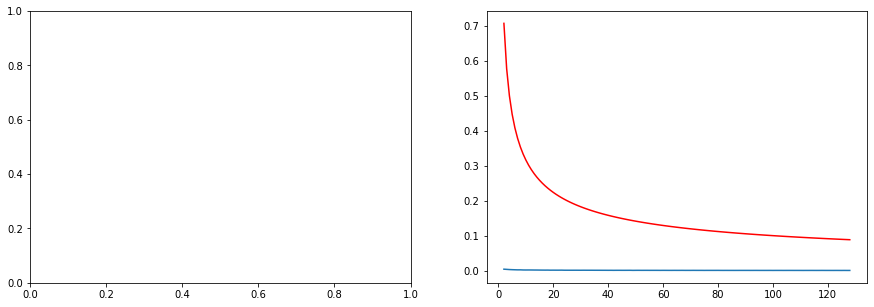

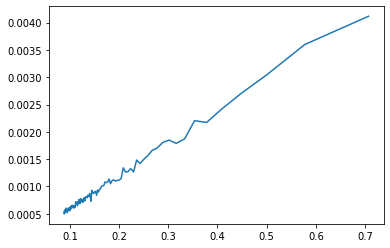

In [5]:
x = np.arange(2, 129)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 2)
plt.plot(x, desvio)
plt.plot(x, 1/np.sqrt(x), c='red')
plt.show()

plt.plot(1/np.sqrt(x), desvio)

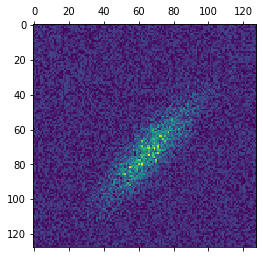

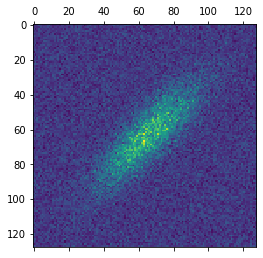

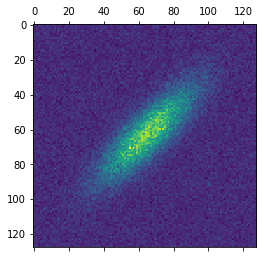

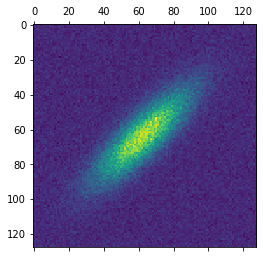

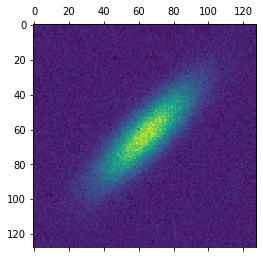

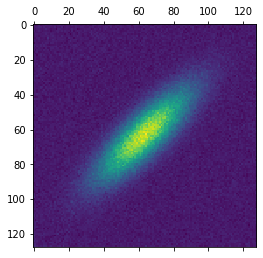

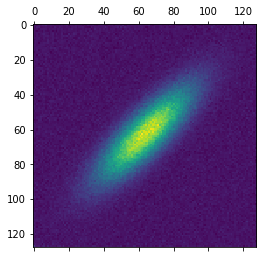

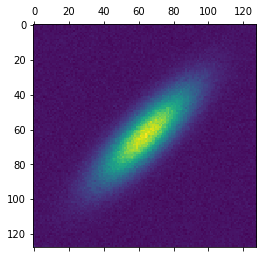

In [6]:
for i in [1,4,16,32,64,128,256,512]:
    imagem = np.sum(CCD[np.random.randint(0, 512, size=i)], axis=0)
    plt.matshow(imagem)
    plt.show()

In [7]:
print("A vantagem desse método está no fato de como o desvio padrão vai diminuindo com o tempo, o ruído também vai decrescendo. Assim com a relação Sinal-Ruido, o sinal tende a subir")

A vantagem desse método está no fato de como o desvio padrão vai diminuindo com o tempo, o ruído também vai decrescendo. Assim com a relação Sinal-Ruido, o sinal tende a subir
